## Тема 6

### Задача A. Быстрый поиск в массиве

Дан массив из 
**N**
 целых чисел. Все числа от 
−
1
0
*`9`*
 до 
1
0
*`9`*
.
Нужно уметь отвечать на запросы вида “Cколько чисел имеют значения от
**L**
 до
**R**
?”.

**Формат ввода**  
Число 
**N**
 (
1
≤
N
≤
1
0
*`5`*
).  
Далее 
**N**
 целых чисел.  
Затем число запросов 
**K**
 (
1
≤
K
≤
1
0
*`5`*
).  
Далее 
**K**
 пар чисел 
**L**
,
**R**
 (
−
1
0
*`9`*
≤
L
≤
R
≤
1
0
*`9`*
) — собственно запросы.

**Формат вывода**  
Выведите 
**K** 
 чисел — ответы на запросы.

**Пример**  
**`Ввод`**	
5  
10 1 10 3 4  
4  
1 10  
2 9  
3 4  
2 2  

**`Вывод`**  
5 2 2 0   

Решение за **O(N^2)**

In [ ]:
n = int(input())
m = list(map(int, input().split()))

k = int(input())
ans = []
for _ in range(k):
  l, r = list(map(int, input().split()))
  cnt = 0
  for i in m:
    if l <= i <= r:
      cnt += 1
  ans.append(cnt) 

print()
print(*ans)     


5
10 1 10 3 4
4
1 10
2 9
3 4
2 2

5 2 2 0


Решение за **O(logN)**

In [ ]:
def l_bin_search(left, right, check, check_params):

    while left < right:
        m = (left + right) // 2
        if check(m, check_params):
            right = m
        else:
            left = m + 1
    return left


def r_bin_search(left, right, check, check_params):

    while left < right:
        m = (left + right + 1) // 2
        if check(m, check_params):
            left = m
        else:
            right = m - 1
    return left


n = int(input())
nums = sorted([int(num) for num in input().split()])


def check(m, eq):
    return nums[m] >= eq


def r_check(m, eq):
    return nums[m] <= eq


check_n = int(input())
ans = ['0'] * check_n

for i in range(check_n):
    l, r = map(int, input().split())
    left_i = l_bin_search(0, n - 1, check, l)
    right_i = r_bin_search(0, n - 1, r_check, r)
    count = right_i - left_i + 1
    if (left_i == right_i == 0 and nums[0] > r) or (left_i == right_i == (n - 1) and nums[n-1] < l):
        ans[i] = '0'
    else:
        ans[i] = str(count)

print(*ans)

---

### Задача B. Номер левого и правого вхождения

Требуется определить в заданном массиве номер самого левого и самого правого элемента, равного искомому числу.

**Формат ввода**  
В первой строке вводится одно натуральное число **N**, не превосходящее 10*`5`*: количество чисел в массиве. Во второй строке вводятся **N** натуральных чисел, не превосходящих 10*`9`*, каждое следующее не меньше предыдущего. В третьей строке вводится количество искомых чисел **M** – натуральное число, не превосходящее 10*`6`*. В четвертой строке вводится **M** натуральных чисел, не превосходящих 10*`9`*.

**Формат вывода**  
Для каждого запроса выведите в отдельной строке через пробел два числа: номер элемента самого левого и самого правого элементов массива, равных числу-запросу. Элементы массива нумеруются с единицы.Если в массиве нет такого числа, выведите в соответствующей строке два нуля, разделенных пробелом.

**Пример 1**  
**`Ввод`**	
4  
1 2 2 3  
4  
4 3 2 1  
  
**`Вывод`**  
0 0  
4 4  
2 3  
1 1  

In [ ]:
def l_bin_search(left, right, check, check_params):

    while left < right:
        m = (left + right) // 2
        if check(m, check_params):
            right = m
        else:
            left = m + 1
    return left


def r_bin_search(left, right, check, check_params):

    while left < right:
        m = (left + right + 1) // 2
        if check(m, check_params):
            left = m
        else:
            right = m - 1
    return left


n = int(input())
nums = [int(num) for num in input().split()]


def check(m, eq):
    return nums[m] >= eq


def r_check(m, eq):
    return nums[m] <= eq


search_n = int(input())
search_nums = [int(num) for num in input().split()]

for i in range(search_n):
    num_to_search = search_nums[i]
    left_i = l_bin_search(0, n - 1, check, num_to_search)
    right_i = r_bin_search(0, n - 1, r_check, num_to_search)

    if nums[left_i] != num_to_search:
        print("0 0")
    else:
        print(f'{left_i + 1} {right_i + 1}')

---

### Задача C. Корень кубического уравнения

Дано кубическое уравнение ax*`3`*+bx*`2`*+cx+d=0 (a≠0). Известно, что у этого уравнения есть ровно один корень. Требуется его найти.

**Формат ввода**  
Во входном файле через пробел записаны четыре целых числа:

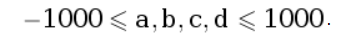

**Формат вывода**  
Выведите единственный корень уравнения с точностью не менее 5 знаков после десятичной точки.

**Пример 1**  
**`Ввод`**	
1 -3 3 -1

**`Вывод`**  
1.0000036491

In [ ]:
def f_bin_search(left, right, eps, check, params):
    while left + eps < right:
        m = (left + right) / 2
        if check(m, eps, params):
            right = m
        else:
            left = m
    return left


def eq(x, params):
    a, b, c, d = params
    return a * x**3 + b * x**2 + c * x + d


def check_pos(x, eps, params):
    return eq(x, params) > 0


def check_neg(x, eps, params):
    return eq(x, params) < 0


parameters = tuple(map(int, input().split()))
epsilon = 0.0000001

if parameters[0] > 0:
    print(f_bin_search(-1000000, 1000000, epsilon, check_pos, parameters))
else:
    print(f_bin_search(-1000000, 1000000, epsilon, check_neg, parameters))

---

### Задача D. Вырубка леса

Фермер Николай нанял двух лесорубов: Дмитрия и Федора, чтобы вырубить лес, на месте которого должно быть кукурузное поле. В лесу растут X деревьев.

Дмитрий срубает по A деревьев в день, но каждый K-й день он отдыхает и не срубает ни одного дерева. Таким образом, Дмитрий отдыхает в K-й, 2K-й, 3K-й день, и т.д.

Федор срубает по B деревьев в день, но каждый M-й день он отдыхает и не срубает ни одного дерева. Таким образом, Федор отдыхает в M-й, 2M-й, 3M-й день, и т.д.

Лесорубы работают параллельно и, таким образом, в дни, когда никто из них не отдыхает, они срубают A + B деревьев, в дни, когда отдыхает только Федор — A деревьев, а в дни, когда отдыхает только Дмитрий — B деревьев. В дни, когда оба лесоруба отдыхают, ни одно дерево не срубается.

Фермер Николай хочет понять, за сколько дней лесорубы срубят все деревья, и он сможет засеять кукурузное поле.

Требуется написать программу, которая по заданным целым числам A, K, B, M и X определяет, за сколько дней все деревья в лесу будут вырублены.

**Формат ввода**  
Входной файл содержит пять целых чисел, разделенных пробелами: A, K, B, M и X (1 ≤ A, B ≤ 10*`9`* , 2 ≤ K, M ≤ 10*`18`*, 1 ≤ X ≤ 10*`18`*).

**Формат вывода**  
Выходной файл должен содержать одно целое число — искомое количество дней.

**Пример 1**  
**`Ввод`**	
1 2 1 3 10

**`Вывод`**  
8

In [ ]:
def l_bin_search(left, right, check, check_params):

    while left < right:
        m = (left + right) // 2
        if check(m, check_params):
            right = m
        else:
            left = m + 1
    return left


a, k, b, m, x = tuple(map(int, input().split()))


def trees_cut(days):
    return a * (days - days // k) + b * (days - days // m)


def check(days, _):
    return trees_cut(days) >= x


print(l_bin_search(0, x, check, ()))

---

### Задача E. Покрытие K отрезками

Даны 
*n*
 точек на прямой, нужно покрыть их 
*k*
 отрезками одинаковой длины 
ℓ
.
Найдите минимальное 
ℓ
.

**Формат ввода**  

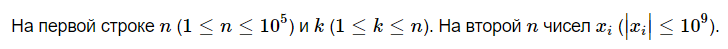

**Формат вывода**  
Минимальное такое 
ℓ
, что точки можно покрыть 
k
 отрезками длины 
ℓ
.

**Пример**  
**`Ввод`**	
6 2  
1 2 3 9 8 7  

**`Вывод`**  
2

In [ ]:
def l_bin_search(left, right, check, check_params):
    while left < right:
        m = (left + right) // 2
        if check(m, check_params):
            right = m
        else:
            left = m + 1
    return left


file = open("input.txt")
n, k = map(int, file.readline().split())
nums = sorted([int(num) for num in file.readline().split()])
file.close()

min_num = nums[0] - 1
nums = [num - min_num for num in nums]


def check(l_num, _):
    count = 1
    cur_start = nums[0]
    for num in nums:
        if (num - cur_start) > l_num:
            cur_start = num
            count += 1
            if count > k:
                return False
    return count <= k


print(l_bin_search(0, nums[-1], check, ()))